# Clase 103 - Automatización de Datos

> Programación Python en el Ámbito Científico
>
> [Alan Badillo Salas](mailto:alan@nomadacode.com)
>
> Github: [https://github.com/dragonnomada/pycien-2023](https://github.com/dragonnomada/pycien-2023)

**Contenido**

* Automatizar la adquisición de datos
* Automatizar la limpieza de datos
* Automatizar la visualización de datos
* Generar reportes automatizados
* Construir una librería de análisis
* Práctica: P102 - Automatizar los datos de Ventas

## Automatizar la adquisición de datos

In [ ]:
! pip install scrapy

In [ ]:
! pip install scrapydo

[https://docs.scrapy.org/en/latest/topics/request-response.html#response-objects](https://docs.scrapy.org/en/latest/topics/request-response.html#response-objects)

In [7]:
import logging
import scrapydo
from scrapy import Request
# from scrapy.linkextractors import LinkExtractor

# logging.basicConfig(level=logging.FATAL)
# logging.getLogger().setLevel(logging.FATAL)
# logging.getLogger().propagate = False

scrapydo.setup()

scrapydo.default_settings.update({
    "LOG_LEVEL": "FATAL",
    "CLOSESPIDER_PAGECOUNT": 10,
})

# lx = LinkExtractor()

def parse_page(response):
    print("Página cargada: %s" % response.url)

    # Extraer la oferta del día
    ofertaDia = response.css(".homePosition5")
    # print(ofertaDia)
    yield {
        "oferta_dia": {
            "titulo": ofertaDia.xpath("//a/div[2]/div/h3/text()").get(),
            "precio_regular": ofertaDia.xpath("//a/div[2]/div/div/div/p[1]/text()").get(),
            "precio_regular_moneda": ofertaDia.xpath("//a/div[2]/div/div/div/p[1]/span/text()").get(),
            "precio_descuento": ofertaDia.xpath("//a/div[2]/div/div/div/p[2]/text()").get(),
            "precio_descuento_moneda": ofertaDia.xpath("//a/div[2]/div/div/div/p[2]/span/text()").get(),
        }
    }

    promos = []

    # Extraer las promociones
    for promoListNode in response.css(".slick-list>.slick-track"):
      title = promoListNode.xpath("../../../../../h2/text()").get()

      # print(title)

      if title == None:
        continue

      items = []

      for promoItemNode in promoListNode.xpath("div"):
        # print(promoItemNode)
        items.append({
            "name": promoItemNode.xpath("./div/article/a/div/h3/text()").get(),
            "stars": promoItemNode.xpath("./div/article/a/div/div[starts-with(@class, 'StarFive_contStarsModule')]/p/text()[2]").get(),
            "price": promoItemNode.xpath("./div/article/a/div/p[starts-with(@class, 'CardProduct_precio1')]/text()").get(),
            "currency": promoItemNode.xpath("./div/article/a/div/p[starts-with(@class, 'CardProduct_precio1')]/span/text()").get(),
            "picture": promoItemNode.xpath("./div/article/a/picture/img/@src").get(),
        })

      promo = {
          "title": title,
          "items": items
      }

      promos.append(promo)

    yield { "promos": promos }

    # yield {"title": response.css("title::text").extract_first()}
    # for link in lx.extract_links(response):
    #     yield Request(link.url, callback=parse_page)

result = scrapydo.crawl("https://www.sanborns.com.mx/", callback=parse_page)


It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the documentation of the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting for information on how to handle this deprecation.


Página cargada: https://www.sanborns.com.mx/


In [8]:
result[0]

{'oferta_dia': {'titulo': 'Consola PS5 Estandar Bundle Horizon',
  'precio_regular': '$15,499',
  'precio_regular_moneda': 'MXN',
  'precio_descuento': '$11,624',
  'precio_descuento_moneda': 'MXN'}}

In [12]:
result[1]["promos"][0]

{'title': 'Lo Más Vendido',
 'items': [{'name': 'FIFA 23 - Xbox One',
   'stars': '10',
   'price': '$599',
   'currency': 'MXN',
   'picture': 'https://resources.sanborns.com.mx/imagenes-sanborns-ii/1200/14633379242.jpg?scale=250&qlty=75'},
  {'name': 'Paco Rabanne One Million Elixir Set Para Caballero Perfume EDP 100ML + Desodorante 150ml + Perfume de Bolsillo 10ML',
   'stars': None,
   'price': '$2,940',
   'currency': 'MXN',
   'picture': 'https://resources.sanborns.com.mx/imagenes-sanborns-ii/1200/3349668614424.jpg?scale=250&qlty=75'},
  {'name': 'Microsoft 365 Family',
   'stars': '23',
   'price': '$1,499',
   'currency': 'MXN',
   'picture': 'https://resources.sanborns.com.mx/imagenes-sanborns-ii/1200/889842862461.jpg?scale=250&qlty=75'},
  {'name': 'Vichy Bloqueador Solar Biodegradable Para Cuerpo FPS 50+',
   'stars': '2',
   'price': '$678',
   'currency': 'MXN',
   'picture': 'https://resources.sanborns.com.mx/imagenes-sanborns-ii/1200/3337875762250.jpg?scale=250&qlty=75'}

In [26]:
promos_frames = []

for promo in result[1]["promos"]:
  # print(promo["title"])
  for item in promo["items"]:
    # print(item)
    promos_frames.append({
        "title": promo["title"],
        "name": item["name"],
        "stars": item["stars"],
        "price": item["price"],
        "currency": item["currency"],
    })

# print(promos_frames)

import pandas as pd

data = pd.DataFrame(promos_frames)

data.sample(10)

,title,name,stars,price,currency
106,Inspiración Profesional,Escritorio Excelsior Omma Chocolate,None,"$2,983",MXN
74,Accesorios para tus Aventuras,Tripié para smartphone Instant Star,3,$149,MXN
10,Lo Más Vendido,Teclado alámbrico HP 150 color negro,2,$229,MXN
90,Joyas que Destacan Tu Estilo,Pulsera de stich con dijes,3,$249,MXN
71,Eleva tu Experiencia Visual,Pantalla Hisense 40 pulgadas FHD VIDAA 40A4HV,None,"$5,495",MXN
105,Inspiración Profesional,Libreta de pasta dura mediana A5 plata con det...,1,$456,MXN
61,Eleva tu Experiencia Visual,Pantalla Hisense 75 pulgadas ULED 4K Android 75U6,2,"$18,995",MXN
18,Lo Más Buscado,Cerave Barra Limpiadora Hidratante 4.5 Oz,5,$199,MXN
98,Inspiración Profesional,Kit bolígrafo Pepe + Libreta morado Penac,1,$164,MXN
56,Conexión Infinita,ZTE Blade V40 Smart 5G 128GB Azul Telcel R6,None,"$4,999",MXN


In [22]:
from datetime import datetime

now = datetime.now().strftime("%Y_%m_%d")

now

'2023_06_30'

In [27]:
data.to_csv(f"sanborns_{now}.csv", encoding="utf-8", index=False)

In [43]:
#
# Descargador Automático de Productos de Principales de Sanborns
#
# Descargador automático de los productos principales
# en la página de Sanborns https://www.sanborns.com.mx/
#
# Versión 1.0
#
# Por Alan Badillo Salas (alan@nomadacode.com)
# Creado el 29 de junio de 2023
#
# Dependencias:
# * scrapy
# * scrapydo
# * pandas
#

def sanborns_downloader():
  print("Descargando los productos de sanborns...")

  import logging
  import scrapydo
  from scrapy import Request

  logging.getLogger().setLevel(logging.FATAL)

  scrapydo.setup()

  scrapydo.default_settings.update({
      "LOG_LEVEL": "FATAL",
      "CLOSESPIDER_PAGECOUNT": 10,
  })

  def parse_page(response):
      print("Página cargada: %s" % response.url)

      print("Descargando promociones...")

      promos = []

      # Extraer las promociones
      for promoListNode in response.css(".slick-list>.slick-track"):
        title = promoListNode.xpath("../../../../../h2/text()").get()

        if title == None:
          continue

        items = []

        for promoItemNode in promoListNode.xpath("div"):
          items.append({
              "name": promoItemNode.xpath("./div/article/a/div/h3/text()").get(),
              "stars": promoItemNode.xpath("./div/article/a/div/div[starts-with(@class, 'StarFive_contStarsModule')]/p/text()[2]").get(),
              "price": promoItemNode.xpath("./div/article/a/div/p[starts-with(@class, 'CardProduct_precio1')]/text()").get(),
              "currency": promoItemNode.xpath("./div/article/a/div/p[starts-with(@class, 'CardProduct_precio1')]/span/text()").get(),
              "picture": promoItemNode.xpath("./div/article/a/picture/img/@src").get(),
          })

        promo = {
            "title": title,
            "items": items
        }

        promos.append(promo)

      yield { "promos": promos }

      print("Promociones descargadas")

  result = scrapydo.crawl("https://www.sanborns.com.mx/", callback=parse_page)

  print("Descarga completada")

  print("Construyendo la tabla de resultados...")

  promos_frames = []

  for promo in result[0]["promos"]:
    for item in promo["items"]:
      promos_frames.append({
          "title": promo["title"],
          "name": item["name"],
          "stars": item["stars"],
          "price": item["price"],
          "currency": item["currency"],
      })

  import pandas as pd

  data = pd.DataFrame(promos_frames)

  print("Tabla construida")

  print("Guardando los resultados...")

  from datetime import datetime

  now = datetime.now().strftime("%Y_%m_%d")

  filename = f"sanborns_{now}.csv"

  data.to_csv(filename, encoding="utf-8", index=False)

  print(f"Resultados guardados como '{filename}'")

  print("LISTO.")

  return filename

In [44]:
sanborns_downloader()

Descargando los productos de sanborns...
Página cargada: https://www.sanborns.com.mx/
Descargando promociones...
Promociones descargadas
Descarga completada
Construyendo la tabla de resultados...
Tabla construida
Guardando los resultados...
Resultados guardados como 'sanborns_2023_06_30.csv'
LISTO.


'sanborns_2023_06_30.csv'

## Automatizar la limpieza de datos

In [29]:
import pandas as pd

data = pd.read_csv("/content/sanborns_2023_06_30.csv")

data.sample(5)

,title,name,stars,price,currency
108,Hogar en Armonía,Home Nature 2 tazas pareja con frase,NaN,$699,MXN
81,Accesorios para tus Aventuras,Funda Galaxy S23 Plus Frame,NaN,$679,MXN
49,Conexión Infinita,Motorola E22i 64GB Blanco Telcel R9,1.0,"$2,999",MXN
100,Inspiración Profesional,Home Nature calendario de madera color blanco ...,NaN,$499,MXN
25,Expresa tu Pasión Musical 🎼,Bajo Eléctrico 4 CuerdasYamaha TRBX174- Azul,NaN,"$7,099",MXN


In [30]:
data.columns = ["CATEGORIA", "PRODUCTO", "ESTRELLAS", "PRECIO", "MONEDA"]

data.sample(5)

,CATEGORIA,PRODUCTO,ESTRELLAS,PRECIO,MONEDA
10,Lo Más Vendido,Teclado alámbrico HP 150 color negro,2.0,$229,MXN
9,Lo Más Vendido,Crema Hidratante Antiarrugas De Día Revitalift...,5.0,$214,MXN
61,Eleva tu Experiencia Visual,Pantalla Hisense 75 pulgadas ULED 4K Android 75U6,2.0,"$18,995",MXN
15,Lo Más Buscado,Bolsa LuLu Color azul Modelo 56351,NaN,$799,MXN
23,Lo Más Buscado,Headset Multiplataforma Turtle Beach RECON500 ...,NaN,"$2,199",MXN


In [31]:
"$123,456.789".replace("$", "").replace(",", "")

'123456.789'

In [32]:
def corregir_precio(precio):
  return float(precio.replace("$", "").replace(",", ""))

data["PRECIO_NUM"] = data["PRECIO"].map(corregir_precio)

data.sample(5)

,CATEGORIA,PRODUCTO,ESTRELLAS,PRECIO,MONEDA,PRECIO_NUM
2,Lo Más Vendido,Microsoft 365 Family,23.0,"$1,499",MXN,1499.0
93,Joyas que Destacan Tu Estilo,Cadena Dvillalpando Con Dije Ai50f En 50 Con D...,NaN,$449,MXN,449.0
60,Eleva tu Experiencia Visual,Pantalla LG 77 pulgadas 4K OLED 77G3PSA,NaN,"$89,995",MXN,89995.0
15,Lo Más Buscado,Bolsa LuLu Color azul Modelo 56351,NaN,$799,MXN,799.0
80,Accesorios para tus Aventuras,Protector de Pantalla iPhone 12 /12 Pro iFrogz,NaN,$174,MXN,174.0


In [34]:
import numpy as np

def corregir_estrellas(estrellas):
  if np.isnan(estrellas):
    return 0
  return int(estrellas)

data["ESTRELLAS_NUM"] = data["ESTRELLAS"].map(corregir_estrellas)

data.sample(5)

,CATEGORIA,PRODUCTO,ESTRELLAS,PRECIO,MONEDA,PRECIO_NUM,ESTRELLAS_NUM
89,Joyas que Destacan Tu Estilo,Collar LuLu Dorados,NaN,$269,MXN,269.0,0
13,Lo Más Buscado,Huawei P60 Pro 256GB Blanco Telcel R7 + Watch ...,NaN,"$25,999",MXN,25999.0,0
111,Hogar en Armonía,Vaso Alebrijos con popote de acero 500 ml,NaN,$483,MXN,483.0,0
9,Lo Más Vendido,Crema Hidratante Antiarrugas De Día Revitalift...,5.0,$214,MXN,214.0,5
103,Inspiración Profesional,Módulo Bermeo Multiuso Excelsior,NaN,"$1,332",MXN,1332.0,0


In [35]:
data_sanborns = data[["CATEGORIA", "PRODUCTO", "ESTRELLAS_NUM", "PRECIO_NUM"]]

data_sanborns.sample(5)

,CATEGORIA,PRODUCTO,ESTRELLAS_NUM,PRECIO_NUM
19,Lo Más Buscado,CD3 BTS Proof Compact Edition,0,949.0
106,Inspiración Profesional,Escritorio Excelsior Omma Chocolate,0,2983.0
36,Mundos entre Páginas,Hábitos Atómicos,7,399.0
98,Inspiración Profesional,Kit bolígrafo Pepe + Libreta morado Penac,1,164.0
66,Eleva tu Experiencia Visual,Pantalla Samsung 65 pulgadas OLED QN65S95CAF,0,41999.0


In [36]:
data_sanborns.to_csv("data_sanborns.csv", encoding="utf-8", index=False)

In [10]:
#
# Limpiador Automático de Productos de Principales de Sanborns
#
# Descargador automático de los productos principales
# en la página de Sanborns https://www.sanborns.com.mx/
#
# Versión 1.0
#
# Por Alan Badillo Salas (alan@nomadacode.com)
# Creado el 29 de junio de 2023
#
# Dependencias:
# * pandas
# * numpy
#

def sanborns_cleanner(filename):
  global data_sanborns

  print(f"Adquiriendo los datos de {filename}")

  import pandas as pd

  data = pd.read_csv(filename)

  print("Datos adquiridos")

  data.columns = ["CATEGORIA", "PRODUCTO", "ESTRELLAS", "PRECIO", "MONEDA"]

  print("Columnas renombradas")

  def corregir_precio(precio):
    return float(precio.replace("$", "").replace(",", ""))

  data["PRECIO_NUM"] = data["PRECIO"].map(corregir_precio)

  print("Precio corregido")

  import numpy as np

  def corregir_estrellas(estrellas):
    if np.isnan(estrellas):
      return 0
    return int(estrellas)

  data["ESTRELLAS_NUM"] = data["ESTRELLAS"].map(corregir_estrellas)

  print("Estrellas corregidas")

  data_sanborns = data[["CATEGORIA", "PRODUCTO", "ESTRELLAS_NUM", "PRECIO_NUM"]]

  print("Columnas filtradas")

  new_filename = "data_sanborns.csv"

  data_sanborns.to_csv(new_filename, encoding="utf-8", index=False)

  print("Archivo guardado")

  print("LISTO.")

  return new_filename

In [11]:
sanborns_cleanner("/content/sanborns_2023_06_30.csv")

Adquiriendo los datos de /content/sanborns_2023_06_30.csv
Datos adquiridos
Columnas renombradas
Precio corregido
Estrellas corregidas
Columnas filtradas
Archivo guardado
LISTO.


'data_sanborns.csv'

## Automatizar la visualización de datos

In [12]:
data_sanborns.sample(5)

,CATEGORIA,PRODUCTO,ESTRELLAS_NUM,PRECIO_NUM
25,Expresa tu Pasión Musical 🎼,Bajo Eléctrico 4 CuerdasYamaha TRBX174- Azul,0,7099.0
81,Accesorios para tus Aventuras,Funda Galaxy S23 Plus Frame,0,679.0
96,Inspiración Profesional,Juego de libreta Elias con 2 bolígrafos,0,401.0
88,Joyas que Destacan Tu Estilo,Anillo de plata 925 Solitario con circonita bl...,0,666.0
2,Lo Más Vendido,Microsoft 365 Family,23,1499.0


In [13]:
#
# Visualizador Automático de 1-EJE Categórico
#
# Visualiza las gráficas principales para un eje
# de tipo categórico.
#
# Versión 1.0
#
# Por Alan Badillo Salas (alan@nomadacode.com)
# Creado el 29 de junio de 2023
#
# Dependencias:
# * pandas
# * numpy
# * matplotlib
#

def dataviz_1_cat(x, name):
  import pandas as pd
  import numpy as np

  x = pd.Series(x).map(lambda xi: f"{xi}")
  labels = list(sorted(x.unique()))

  print(labels)

  weights = [x[x == label].count() for label in labels]
  bars = np.arange(len(labels))

  print(weights)

  max_weight = max(weights)
  max_weight_index = weights.index(max_weight)

  min_weight = min(weights)
  min_weight_index = weights.index(min_weight)

  explode = np.zeros(len(weights))

  for i in range(len(weights)):
    if weights[i] == max_weight:
      explode[i] = 0.1
    elif weights[i] == min_weight:
      explode[i] = 0.2

  import matplotlib.pyplot as plt

  plt.bar(bars, height=weights)
  plt.xticks(bars, labels, rotation=90)
  plt.savefig(f"sanborns_{name}_bars.png")
  plt.show()

  plt.pie(weights, labels=labels, autopct="%% %.1f", explode=explode)
  plt.savefig(f"sanborns_{name}_pie.png")
  plt.show()

  plt.pie(weights, labels=labels, autopct="%% %.1f", explode=explode)
  circle=plt.Circle( (0,0), 0.7, color="white")
  plt.gcf().gca().add_artist(circle)
  plt.savefig(f"sanborns_{name}_donout.png")
  plt.show()

['Accesorios para tus Aventuras', 'Conexión Infinita', 'Eleva tu Experiencia Visual', 'Expresa tu Pasión Musical 🎼', 'Hogar en Armonía', 'Inspiración Profesional', 'Joyas que Destacan Tu Estilo', 'Lo Más Buscado', 'Lo Más Vendido', 'Mundos entre Páginas']
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


<ipython-input-13-9807ee534c9e>:50: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from current font.
  plt.savefig(f"sanborns_{name}_bars.png")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


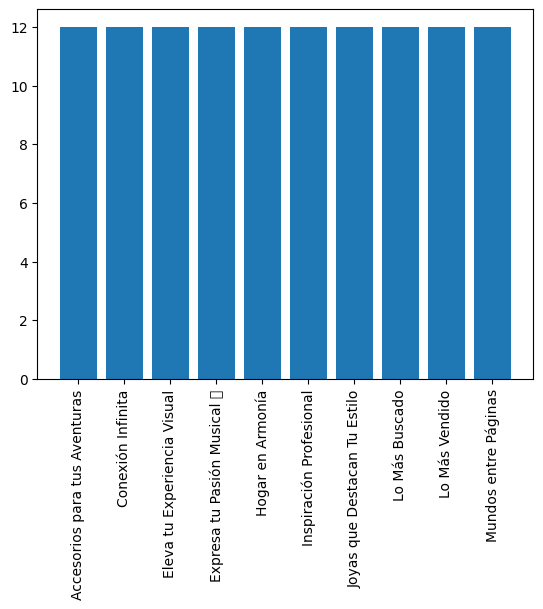

<ipython-input-13-9807ee534c9e>:54: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from current font.
  plt.savefig(f"sanborns_{name}_pie.png")


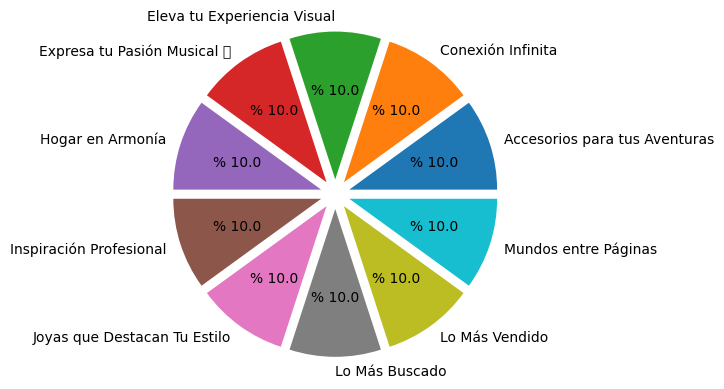

<ipython-input-13-9807ee534c9e>:60: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from current font.
  plt.savefig(f"sanborns_{name}_donout.png")


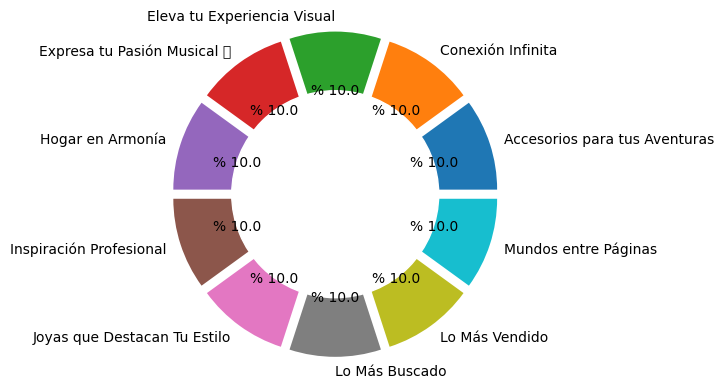

In [14]:
dataviz_1_cat(data_sanborns["CATEGORIA"], "categorias")

['0', '1', '10', '12', '13', '15', '16', '2', '23', '26', '3', '38', '4', '5', '64', '7', '9']
[88, 8, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1, 1, 2, 1, 1, 2]


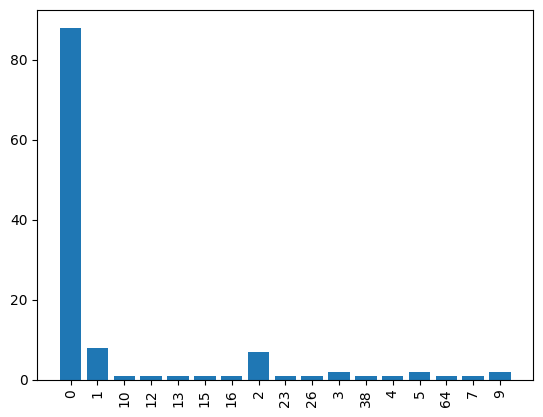

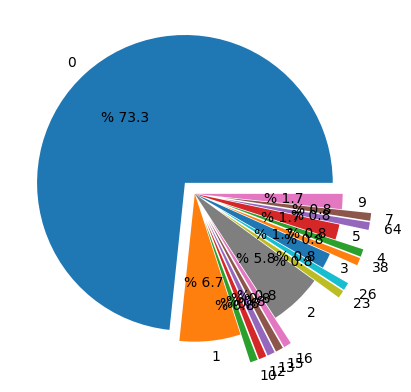

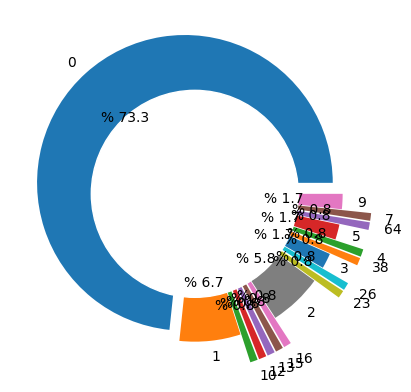

In [103]:
dataviz_1_cat(data_sanborns["ESTRELLAS_NUM"], "estrellas")

In [18]:
#
# Conversor de Datos de 1-EJE Continuo a 1-EJE Categórico
#
# Transforma los valores en 4 categorías automáticas,
# 1. BAJO - valor umbral
# 2. MEDIO BAJO - 2 * BAJO,
# 3. MEDIO ALTO - 3 * BAJO
# 4. ALTO - > MEDIO ALTO.
#
# Versión 1.0
#
# Por Alan Badillo Salas (alan@nomadacode.com)
# Creado el 29 de junio de 2023
#
# Dependencias:
# - Ninguna
#

def auto_cat(threshold):
  def mapper(xi):
    if xi <= threshold:
      return "1. BAJO"
    if xi <= 2 * threshold:
      return "2. MEDIO BAJO"
    if xi <= 3 * threshold:
      return "3. MEDIO ALTO"
    else:
      return "4. ALTO"
  return mapper

['1. BAJO', '2. MEDIO BAJO', '3. MEDIO ALTO', '4. ALTO']
[35, 25, 5, 55]


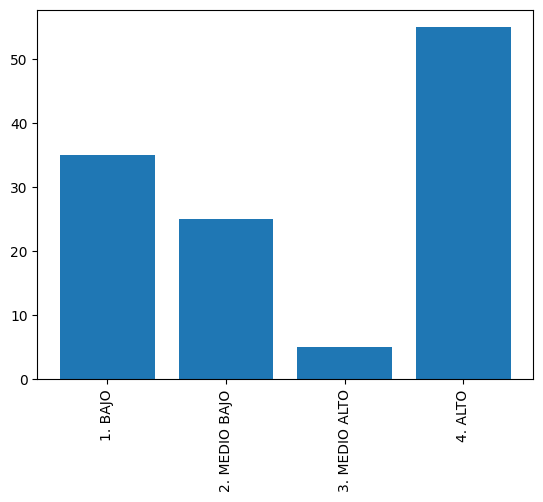

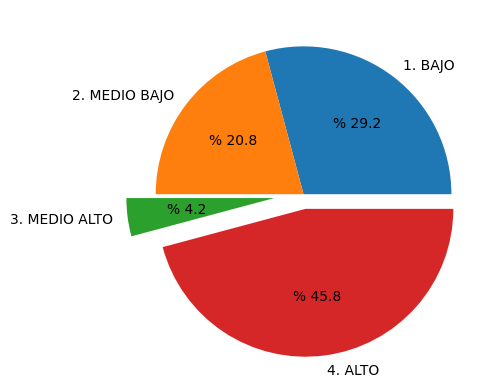

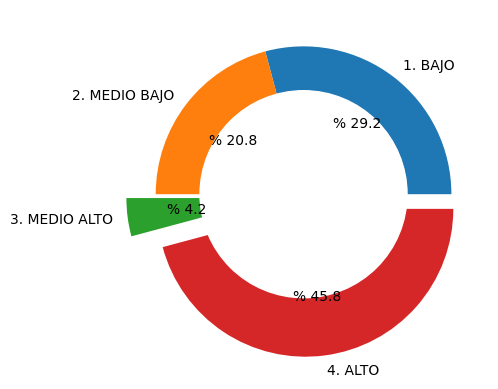

BAJO
86.0 - 399.0
MEDIO BAJO
399.0 - 798.0
MEDIO ALTO
798.0 - 1197.0
ALTO
1197.0 - 117599.0


In [19]:
umbral = data_sanborns["PRECIO_NUM"].quantile(0.25)

precio_cat = data_sanborns["PRECIO_NUM"].map(auto_cat(umbral))

dataviz_1_cat(precio_cat, "precio")

print("BAJO")
print(data_sanborns["PRECIO_NUM"].min(), end=" - ")
print(data_sanborns["PRECIO_NUM"].quantile(0.25))

print("MEDIO BAJO")
print(data_sanborns["PRECIO_NUM"].quantile(0.25), end=" - ")
print(2 * data_sanborns["PRECIO_NUM"].quantile(0.25))

print("MEDIO ALTO")
print(2 * data_sanborns["PRECIO_NUM"].quantile(0.25), end=" - ")
print(3 * data_sanborns["PRECIO_NUM"].quantile(0.25))

print("ALTO")
print(3 * data_sanborns["PRECIO_NUM"].quantile(0.25), end=" - ")
print(data_sanborns["PRECIO_NUM"].max())

## Generar reportes automatizados

[https://pyfpdf.readthedocs.io](https://pyfpdf.readthedocs.io/en/latest/)

In [ ]:
! pip install fpdf

In [20]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", "B", 16)
pdf.cell(40, 10, "Hello World!")
pdf.output("hello.pdf", "F")

''

In [236]:
#
# Generador de Reportes PDF
#
# Define un conjunto de funciones útiles para
# generar reportes PDF
#
# Versión 1.0
#
# Por Alan Badillo Salas (alan@nomadacode.com)
# Creado el 29 de junio de 2023
#
# Dependencias:
# * PANDAS
#

report_pdf = None

report_page_width = 210
report_page_height = 297

report_title_font_size = 24
report_title_height = 18

report_subtitle_font_size = 20
report_subtitle_height = 14

report_text_font_size = 12
report_text_height = 6
report_text_max_length = 70

report_cell_x = 20
report_cell_y = 20

def report_create():
  global report_pdf
  print("Creando reporte...")
  from fpdf import FPDF
  pdf = FPDF(format="A4", unit="mm")
  pdf.add_page()
  report_pdf = pdf
  return pdf

def report_title(text, align="L", border=False, pdf = None):
  global report_cell_x, report_cell_y

  print("Creando título...")

  text = str(text)

  if pdf == None:
    pdf = report_pdf

  pdf.set_font("Courier", "B", report_title_font_size)

  for line in text.strip().split("\n"):
    line = line.strip()
    if line == '':
      pdf.ln()
      continue
    pdf.cell(0, h=report_subtitle_height, txt=line, border=border, ln=1, align=align)

def report_subtitle(text, align="L", border=False, pdf = None):
  global report_cell_x, report_cell_y

  print("Creando subtítulo...")

  text = str(text)

  if pdf == None:
    pdf = report_pdf

  pdf.set_font("Courier", "B", report_subtitle_font_size)
  for line in text.strip().split("\n"):
    line = line.strip()
    if line == '':
      pdf.ln()
      continue
    pdf.cell(0, h=report_subtitle_height, txt=line, border=border, ln=1, align=align)

def report_text(text, separated=True, align="L", border=False, style='', pdf = None):
  global report_cell_x, report_cell_y

  print("Agregando texto...")

  text = str(text)

  if pdf == None:
    pdf = report_pdf

  pdf.set_font("Courier", size=report_text_font_size, style=style)

  if separated:
    pdf.ln()

  import json
  import re

  for line in text.strip().split("\n\n"):
    text = re.sub("\s*\n\s*", " ", line.strip())

    # print(json.dumps({"text": text}))

    i = 0

    while i < len(text):
      j = i+report_text_max_length

      while j < len(text) and j > i and re.match(r"[A-Za-z0-9]", text[j]):
        j -= 1

      # print(i, j)
      line = text[i:j].strip()
      # print("LINE:", line)
      if line == '':
        pdf.ln()
        continue
      line = str(line.encode(encoding="utf-8").decode("utf-8"))
      pdf.cell(0, h=report_text_height, txt=line,
               border=border, ln=1, align=align)
      # pdf.ln()
      i = j

    if separated:
      pdf.ln()

  if separated:
    pdf.ln()

def report_new_page(pdf = None):
  print("Agregando nueva página...")

  if pdf == None:
    pdf = report_pdf

  pdf.add_page()

def report_new_line(pdf = None):
  print("Agregando nueva página...")

  if pdf == None:
    pdf = report_pdf

  pdf.ln()

def report_add_image(src, w=100, title=None, legend = None, pdf = None):
  print("Agregando imagen...")

  if pdf == None:
    pdf = report_pdf

  if title != None:
    pdf.set_font("Courier", size=8, style="B")
    pdf.cell(0, h=4, txt=title, border=1, ln=1, align="C")
    pdf.ln()

  x = int(report_page_width/2 - w/2)

  pdf.image(src, x=x, w=w)

  if legend != None:
    pdf.set_font("Courier", size=8)
    pdf.cell(0, h=4, txt=legend, border=1, ln=1, align="C")

def report_save(filename, pdf = None):
  print("Guardando reporte...")

  if pdf == None:
    pdf = report_pdf

  pdf.output(f"{filename}.pdf", "F")
  pdf.close()

  print("REPORTE CREADO")
  print("LISTO.")

In [197]:
report_create()
report_title("Reporte de Prueba")
report_subtitle("Subtítulo del reporte")
report_text("""
  Este es un texto demasiado largo que contiene muchos caracteres
  los cuales serán mostrados transitivamente como texto en la celda
  el reporte cortará automáticamente el texto para adaptarlo
  y poder así mostrarlo en varias celdas.


  Si el texto contiene dobles saltos de línea serán respetados, por
  ejemplo, los cortes se harán mediante los símbolos especiales?????????
  ............................................. estos serán ignorados ....
  ........................................................................
  en el corte de palabras.


  Este es otro ejemplo si el texto supera muchas líneas.
""")
report_add_image("/content/sanborns_precio_donout.png",
                 title="Gráfica 1 - Este es el título de la imágen",
                 legend="Fig. 1 - Esta es la leyenda de la imágen")
report_save("report_demo")

Creando reporte...
Creando título...
Creando subtítulo...
Agregando texto...
Agregando imagen...
Guardando reporte...
REPORTE CREADO
LISTO.


In [183]:
data_sanborns.sample(5)

,CATEGORIA,PRODUCTO,ESTRELLAS_NUM,PRECIO_NUM
107,Inspiración Profesional,Calculadora Científica FX-991LAPLUS2-S-MT Casi...,26,599.0
63,Eleva tu Experiencia Visual,Pantalla TCL 55 pulgadas 4K UHD Roku TV 55S453,1,8195.0
90,Joyas que Destacan Tu Estilo,Pulsera de stich con dijes,3,249.0
5,Lo Más Vendido,Audífonos STF Aurum On Ear gris,0,319.0
7,Lo Más Vendido,Pantalla Samsung 50 Pulgadas LED 4K UN50AU8000...,64,7695.0


In [216]:
df = data_sanborns.sample(5)

print(df["CATEGORIA"].to_string())

57       Conexión Infinita
17          Lo Más Buscado
3           Lo Más Vendido
49       Conexión Infinita
39    Mundos entre Páginas


In [233]:
data_sanborns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CATEGORIA      120 non-null    object 
 1   PRODUCTO       120 non-null    object 
 2   ESTRELLAS_NUM  120 non-null    int64  
 3   PRECIO_NUM     120 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


In [244]:
# Reporte de Productos Principales de Sanborns México

# Creación del reporte

report_create()

# Título

report_title("Reporte de Productos Principales")
report_title("de Sanborns México")
report_new_line()
report_text("Centro de Investigación en Cómputo", style="B", separated=False)
report_text("Instituto Politécnico Nacional", style="B", separated=False)
report_text("Por Alan Badillo Salas (alan@nomadacode.com)", style="I")

# Introducción

report_subtitle("Introducción")
report_text("""
            El siguiente reporte muestra los productos principales
            extrídos desde la página oficial de Sanborns México,
            que se puede consultar en:


            https://www.sanborns.com.mx/


            Los datos y gráficas corresponden a las principales
            promociones ofertadas en la página principal del
            sitio web bajo distintas categorías como los más vendidos,
            los más buscados, accesorios, hogar, etc.
""")

# Información del Dataset

report_subtitle("Conjunto de datos")

report_text("TOTAL DE MUESTRAS EXTRAÍDAS", separated=False, style="B")
report_text(data_sanborns.count()[0], separated=False)
report_new_line()

report_text("COLUMNAS         BYTES", separated=False, style="B")
report_text(data_sanborns.memory_usage().to_string().replace("\n", "\n\n"), separated=False)
report_new_line()

report_text("MEMORIA TOTAL EN BYTES", separated=False, style="B")
report_text(data_sanborns.memory_usage().sum(), separated=False)
report_new_line()

report_new_page()

report_subtitle("Muestras de por eje")

report_text("""
            En la siguiente tabla podemos observar una muestra de
            5 productos extraídos desde el sitio.
""")

report_text("CATEGORÍA", style="B", separated=False)
report_text(df["CATEGORIA"].to_string().replace("\n", "\n\n"), separated=False)
report_new_line()

report_text("PRODUCTO", style="B", separated=False)
report_text(df["PRODUCTO"].to_string().replace("\n", "\n\n"), separated=False)
report_new_line()

report_text("PRECIO_NUM", style="B", separated=False)
report_text(df["PRECIO_NUM"].to_string().replace("\n", "\n\n"), separated=False)
report_new_line()

report_text("ESTRELLAS_NUM", style="B", separated=False)
report_text(df["ESTRELLAS_NUM"].to_string().replace("\n", "\n\n"), separated=False)
report_new_line()

report_new_page()

report_add_image("/content/sanborns_categorias_donout.png",
                 title="Gráfica de los productos en cada categoría",
                 legend="Fig. 1 - Muestra el porcentaje de productos en cada categoría")

report_new_line()

report_add_image("/content/sanborns_precio_pie.png",
                 title="Gráfica del rango de precios de todos los productos",
                 legend="Fig. 1 - Muestra el porcentaje de productos en cada rango de precios")

report_save("report_sanborns")

Creando reporte...
Creando título...
Creando título...
Agregando nueva página...
Agregando texto...
Agregando texto...
Agregando texto...
Creando subtítulo...
Agregando texto...
Creando subtítulo...
Agregando texto...
Agregando texto...
Agregando nueva página...
Agregando texto...
Agregando texto...
Agregando nueva página...
Agregando texto...
Agregando texto...
Agregando nueva página...
Agregando nueva página...
Creando subtítulo...
Agregando texto...
Agregando texto...
Agregando texto...
Agregando nueva página...
Agregando texto...
Agregando texto...
Agregando nueva página...
Agregando texto...
Agregando texto...
Agregando nueva página...
Agregando texto...
Agregando texto...
Agregando nueva página...
Agregando nueva página...
Agregando imagen...
Agregando nueva página...
Agregando imagen...
Guardando reporte...
REPORTE CREADO
LISTO.


## Construir una librería de análisis

## Práctica: P102 - Automatizar los datos de Ventas